University of Helsinki, Master's Programme in Mathematics and Statistics  
MAST32001 Computational Statistics, Autumn 2023  
Luigi Acerbi  

# Home exam

**Deadline:** Friday 27 October at 23:55

- Please return your solutions for Problem 2 as a separate Python source file `problem2.py` and the others in this notebook to Moodle.
- **You must answer Problems 1-3. Please answer 2 out of 3 of the remaining problems (Problems 4-6).**
- Each problem is worth 6 points. The maximum score is 30 points.
- Please note that this exam is *not* teamwork. You must find the answers to the questions just by yourself with no help from others.
- Please write your full name, email address and student ID number in the cell below. By doing so, you are confirming that you are the only author of the answers and solutions in the submitted notebook and code:

## Home exam taker

- **Name:** Jack Sheridan
- **Email address:** jack.sheridan@helsinki.fi
- **Student ID:** 014686902

## General instructions (IMPORTANT!)

1. When returning your solutions, please leave your code and output in the notebook. You will not get points for results that are not included in the notebook even if they could be obtained by running the code. You will not get results if you provide the solutions without the code used to generate them.
2. When returning your solutions, please make sure the notebook can be run cleanly using "Cell" / "Run All".
3. Please make sure there are no dependencies between solutions to different problems.
4. Please make sure that your notebook will not depend on any local files.
5. Please make sure that the solutions for each problem in your notebook will produce the same results when run multiple times, i.e. remember to seed any random number generators you use (e.g., `npr.seed()`!).
6. Please make your code readable. You are not required to write high-quality code, but make some effort to clean it up and add comments when necessary so that it is easy to follow what's going on. (But do not exceed in the opposite direction of explaining every single line.)
7. Make sure you only use the functions specified in the statement of each problem. You can use `matplotlib` plotting in all problems if you wish.
8. The problems are meant to be solved based on contents of the course. You can reuse functions from the class exercises. You should not search for solutions online and in any case must not use any solutions possibly found.
9. **Remember to fill in your full name, email address and student ID in the cell above.** (If for some reason you don't have a student ID yet, leave that empty.)

---

## COMPULSORY PROBLEMS

---

## 1. Check and fix my MCMC (COMPULSORY)

Which of the MCMC algorithms presented below will *eventually* converge to produce samples from the target probability distribution defined by the corresponding `ltarget(x)` functions?

- Justify your answers (both positive and negative) briefly.
- For each sampler that will not converge to the correct distribution, suggest a change to fix it to converge to the intended target distribution.
- **You should never change the target distribution `ltarget(x)`.** 
- Your fix should keep the function `sample_q(x)` for drawing samples from the proposal the same, if possible. **Only change `sample_q(x)` if there is no other way to fix the sampler**.

### Problem descriptions

In all cases, we assume we are using a Metropolis-Hastings sampler that takes three arguments: 
- the log-target density `ltarget(x)`;
- the proposal density `eval_logq(xp, x)` evaluating $\log q(x';x)$, i.e. the log probability of proposing $x'$ denoted by `xp` when the current state is $x$; 
- a function `sample_q(x)` to draw samples $x'$ from the proposal $q(x' ; x)$.

We assume that the sampler is initialized at a valid point `x0` (for which the log-target is not `-np.inf`). The sampler will take `2*n` samples, throwing away the first `n` for warmup. `n` is assumed to be a sufficiently large number to ensure convergence *if* the algorithm is correct. For some problems, the required `n` might be astronomically large, but that's fine: this problem is not asking about efficiency, but about *correctness*.

The following snippet of code is used to draw the samples and compute the acceptance probability `accrate`:
``` {python}
import numpy as np
import numpy.random as npr
import scipy.stats as sps

xp = sample_q(x)
accrate = np.minimum(1, np.exp(ltarget(xp) + eval_logq(x, xp) - ltarget(x) - eval_logq(xp, x)))
```

Many samplers are based on a symmetric proposal with $q(x';x) = q(x;x')$ and define `eval_logq(xp, x) = 0`. This is OK if the proposal really is symmetric, because then `eval_logq(x, xp) == eval_logq(xp, x)`, making the corresponding terms to cancel out in the above acceptance rate.

*Notes and hints*: 
- Since the sampler is a Metropolis-Hastings sampler, what you need to check is mostly two things: (1) whether the log-proposal pdf is implemented correctly, and (2) if the proposal would allow the chain to (eventually) explore the entire target distribution.
- **You are not required to run any code: answering the questions and providing code for the fixed functions is enough.**
- Still, as a way to double-check your hypotheses and answers, sometimes it can be useful for you to write code and run the proposed Metropolis-Hastings samplers on the given problems. Write this test code in a separate file, not here.
- For example, plot a normalized histogram of the samples obtained from the MCMC run overlaid on top of the (normalized) true target pdf.
- However, note that the problem is asking if a sampler will *eventually* converge. If the sampler would converge with an astronomically large `n`, it would still count as converging for the purpose of this question. For some problems, you might be unable to see convergence by simply running the sampler on your computer (unless you can run it for an astronomically large `n`), in which case you will have to think asymptotically. In particular, finite-time diagnostic like $\hat{R}$ are not necessarily informative about *asymptotic* convergence.
- Check if the target is a proper density (normalized or unnormalized).
- Do **not** submit your test code or test plots (those are only useful checks for you). Below, only write your answer and a brief justification including, if needed, a snippet of code for what needs to be fixed.

### The problems:


Case 1:
``` {python}
    def ltarget1(x):
        if np.abs(x) < np.pi:
            return x*np.cos(x)
        else:
            return -np.inf

    def eval_logq1(xp, x):
        return 0

    def sample_q1(x):
        return npr.uniform(-np.pi/2, np.pi/2)
```

Case 2:
``` {python}
    def ltarget2(x):
        return sps.t.logpdf(x-1, df=5)

    def eval_logq2(xp, x):
        return 0

    def sample_q2(x):
        return x-1 + npr.standard_t(df=1)

```

Case 3:
``` {python}
    def ltarget3(x):
        if np.abs(x)>.99 and np.abs(x) < 3:
            return sps.norm.logpdf(x, 0, 1)
        else:
            return -np.inf

    def eval_logq3(xp, x):
        return 0

    def sample_q3(x):
        return x + npr.triangular(-2,0,2)
```

Case 4:
``` {python}
    def ltarget4(x):
        if np.abs(x) < 10:
            return sps.dgamma.logpdf(x,2)
        elif np.abs(x) > 20 and np.abs(x) < 30:
            return -np.inf
        else:
            return -np.abs(x)

    def eval_logq4(xp, x):
        return 0

    def sample_q4(x):
        return x + npr.uniform(-2, 2)
```
Case 5:
``` {python}
    def ltarget5(x):
        return -np.abs(x+1)

    def eval_logq5(xp, x):
        return scipy.stats.t.logpdf(xp,loc=x,df=1)

    def sample_q5(x):
        return x + npr.exponential(scale=1e-2) - npr.exponential(scale=1e-2)
```

Case 6:
``` {python}
    def ltarget6(x):
        return -np.log(np.abs(np.sin(x)))

    def eval_logq6(xp, x):
        return scipy.stats.norm.logpdf(xp,loc=x,scale=1.0)

    def sample_q6(x):
        return x + npr.normal(0, 1.0)
```

### Your answer:

Mark if the samplers will eventually converge to a proper target distribution by removing the wrong answer:
1. no
    - The proposal distribution does not depend on the previous state, and it will never propose values outside of its initial range.
    Therefore the random walk cannot explore the probability space.
    - Fix: one example - redefine the proposal as `return x + npr.uniform(-np.pi/2, np.pi/2)`
2. yes
    - Theoretical but inefficient convergence (?) `df=1` will create very large tails.
    - Use a Normal proposal, unless very large proposals are desired, or set `df=1`
3. yes
    - Convergence but inefficient. Proposal can move to regions that outside the support of the target, and also does this with uniform probability.
    - Modify the proposal to always start within the target support e.g. 
    - `def sample_q3(x): l = np.min(-2, 0.99 - x); r = np.min(2, 3 - x);  return x + np.random.triangular(left, 0, right);`
4. no
    - The random walk can enter a region from which it might never escape from (-20, -30) or (20, 30).
    - Use a mixture/min-max proposal or explicitly restrict the propsal to the valid constraints.
5. no
    - the target isn't a valid density - doesn't integration to 1
6. yes
    - the normal proposal can explore the whole probability space, even if it would take an intractable amount of time.


## 2. Numerical computation of probabilities (COMPULSORY)

For each of the cases below, write a function to compute the requested log-probabilities in a numerically stable manner. The functions will be tested on a number of inputs and the scoring depends on the number of cases handled correctly. The functions will only be tested with valid inputs satisfying the constraints defined below.
Your functions should return a **single scalar value**.

*Note*: Your code may only use basic `numpy`, `scipy.special`, and `scipy.linalg` functions (including `numpy.linalg`, `scipy.special.gammaln()`, and `scipy.special.multigammaln()`).

- **Remember to make sure your code includes necessary imports to run without any additional interaction!**
- **Return your solution as a separate file `problem2.py` that contains the definitions of the two functions `lp1()` and `lp2()` as outlined below to Moodle.**
- **Do not add your name to the file, just name it `problem2.py`.** 
- **Your functions should return a single scalar value.**

1. The log-probability density $\log p(x \mid \mathbf{v}, \mathbf{w})$ of a mixture of $K$ [Nakagami distributions](https://en.wikipedia.org/wiki/Nakagami_distribution) with
$$
p(x \mid \mathbf{v}, \mathbf{w}) = \sum_{k=1}^K w_k \frac{2 v_k^{v_k}}{\Gamma(\nu_k)} x^{2 v_k-1} \exp \left(-v_k x^2\right)
$$
where $x \in \mathbb R^+$, $\mathbf{v}, \mathbf{w} \in \mathbb{R}^K$, with $0 \le w_k \le 1$, $\sum_{k=1}^K w_k = 1$, and $v_k > 0$. Your code should work for an arbitrary number of mixture components $K \ge 1$.

2. The log-probability density $\log p(\mathbf{X}; \mathbf{\Psi}, \nu)$ of the [inverse Wishart distribution](https://en.wikipedia.org/wiki/Inverse-Wishart_distribution) with
$$
p(\mathbf{X}; \mathbf{\Psi}, \nu)=\frac{|\mathbf{\Psi}|^{\nu / 2}}{2^{\nu p / 2} \Gamma_p\left(\frac{\nu}{2}\right)}|\mathbf{X}|^{-(\nu+p+1) / 2} \exp \left\{ {-\frac{1}{2} \text{Tr}\left(\mathbf{\Psi} \mathbf{X}^{-1}\right) }\right\} 
$$
where $\mathbf{X}, \mathbf{\Psi} \in \mathbb R^{p\times p}$ are symmetric and positive definite matrices, $\nu>p-1$ are the "degrees of freedom", $\Gamma_p$ is the multivariate gamma function, and $\text{Tr}$ is the matrix trace.

*Notes and hints*:
- To compute $\text{Tr}(\mathbf{\Psi} \mathbf{X}^{-1})$, one solution is to calculate the explicit inverse $\mathbf{X}^{-1}$ via Cholesky decomposition, and then get the trace of matrix product efficiently via [einsum](https://numpy.org/doc/stable/reference/generated/numpy.einsum.html?highlight=einsum#numpy.einsum) without having to compute the diagonal values before the trace. You are welcome to do a more efficient implementation.
- Ensure that you are returning the log probability and not the probability.
- Check that your code is numerically stable and robust to extreme values of the inputs.
- Failure to follow the instructions for code submission (e.g., failing to submit the functions as a separate file called `problem2.py`) will result in zero points from this exercise.

In [239]:
# Write your functions lp1() and lp2() to replace the functions here. Do not change the names of the functions.
# Then copy the content of this cell into a separate file named 'problem2.py' to be submitted separately on Moodle.
# The file should include these import instructions and no others.
# Note that 'problem2.py' should be a standard Python source file (i.e., a text file, not a Jupyter notebook).

import numpy as np
from scipy.special import gammaln, multigammaln, logsumexp
import numpy as np
import scipy.linalg as slg
from scipy.special import multigammaln


def lp1(x: np.ndarray, v: np.ndarray, w: np.ndarray) -> float:
    """Returns log p(x | v, w).
    Input:
    x: double
    v: np.array, shape: (K,)
    w: np.array, shape: (K,)
    """
    
    # Handle values outside of support
    if np.any(x <= 0):
        raise ValueError("x must be positive")
    if v.shape != w.shape:
        raise ValueError("v and w must have the same shape")
    if not np.allclose(w.sum(), 1):
        raise ValueError("w must sum to 1")
    if np.any(v <= 0):
        raise ValueError("v must be positive")

    term0 = np.log(w)
    term1 = v * np.log(2 + v)
    term2 = gammaln(v)
    term3 = (2*v - 1) * np.log(x)
    term4 = -v*(x**2)
    return logsumexp(
        term0 + term1 - term2 + term3 + term4
    )



def lp2(X: np.ndarray, Psi: np.ndarray, nu: int) -> float:
    """Returns log p(x | \Psi, \nu)
    Input:
    x: np.array, shape: (p,p)
    Psi: np.array, shape: (p,p)
    nu: double, \nu > p-1
    """
    # Dimension of the input matrices
    p = X.shape[0]

    if len(X.shape) > 1:
        if X.shape[0] != X.shape[1]:
            raise ValueError("X must be a square matrix.")

    if nu <= p - 1:
        raise ValueError("'nu' must be greater than p - 1.")

    try:
        L = np.linalg.cholesky(X)

        Y = slg.solve_triangular(L, Psi, lower=True)

        Z = slg.solve_triangular(L.T, Y, lower=False)
    except Exception as e:
        raise ValueError(f"Choleksy decomposition failed for X {X}") from e

    try:
        det_psi = np.linalg.det(Psi)
    except Exception as e:
        raise ValueError(f"np.linalt.det(Psi) value {Psi}") from e

    trace_psi__inv = np.trace(Z)

    term1 = nu / 2 * np.log(det_psi)
    term2 = - (nu * p / 2) * np.log(2)
    term3 = - multigammaln(nu / 2, p) 
    term4 = - ((nu + p + 1) / 2) * np.log(np.linalg.det(X))
    term5 = -(1/2) * trace_psi__inv

    return np.sum([term1, term2, term3, term4, term5])



In [240]:
# Example invocations of the functions, should return a single scalar value
test1 = lp1(.5, np.array([1e-10,3e5]), np.array([0.75, 0.25]))
print(test1)

test2 = lp2(np.eye(2)-.1, np.eye(2)+.1, 3.)
print(test2)

-22.620385821868883
-2.8381112578357293


### Your textual answer explaining your solutions:

There is not too much to explain. I make to use log probabilities, use logsumexp when appropriate and try to handle possible invalid inputs :) 

## 3. Approximating an expectation (COMPULSORY)

Develop a Monte Carlo method for approximately evaluating the expectation
$$ V = \mathbb{E}_{p(\theta)}\left[\theta^2\right] = \int_{0}^{\infty} p(\theta) \cdot \theta^2 \,\mathrm{d}\theta $$
over the (normalised) distribution
$$ p(\theta) = \sqrt{\frac{2}{\pi}} \frac{\theta^2 \exp(-\frac{\theta^2}{8})}{8}. $$

1. You should provide an estimate of $V$ that has an error of at most $\pm 10^{-2}$, but the method must allow increasing the accuracy if needed (typically using more computation).

2. Report both your estimate of $V$ and a 95% confidence interval for the value.

3. Write a brief explanation of the methods used, why you could apply them, and justify why your solution would converge to the correct value given enough computation, using both empirical validation and/or theoretical principles, as appropriate for the chosen method.

You may use `numpy`, `numpy.random`, `scipy.special`, `scipy.stats`, `matplotlib`, `autograd` and `torch` functions for the task.

*Hints*: 
- You can get a 95% confidence interval by running your procedure $N$ times, reporting the mean as value and using plus/minus two times the standard error of the mean ($\mathrm{SE} = \sigma / \sqrt{N}$) for the interval.
- We saw many Monte Carlo methods in the course that could be used to compute this expectation, such as rejection sampling, importance sampling, various Markov Chain Monte Carlo techniques, etc. Pick the one you think would be most suitable here. There are no extra points for choosing an unnecessarily complex method, if a simple one is sufficient.
- Whichever method you use, remember to **fully justify the validity of your solution** (depending on the chosen method, this might require diagnostics, referring to the theory, or both). A correct answer with no valid justification will only get a small fraction of the points.

In [200]:
from typing import Callable
from matplotlib import pyplot as plt
from scipy import stats as ss
import seaborn as sns
sns.set()
sns.set_style("whitegrid")

import numpy as np

def f_pdf(theta: np.ndarray) -> np.ndarray:
    term1 = .5 * np.log(2/ np.pi)
    term2 = 2 * np.log(theta)
    term3 = -((theta**2) / 8)
    term4 = np.log(8)
    return np.exp((term1 + term2 + term3 - term4) + (2 * np.log(theta)))

g_dist = ss.t(df=2, loc=4.1, scale=1.2)
M = 18


/home/sjack/.cache/pypoetry/virtualenvs/computational-statistics-qlF0ErcH-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sjack/.cache/pypoetry/virtualenvs/computational-statistics-qlF0ErcH-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sjack/.cache/pypoetry/virtualenvs/computational-statistics-qlF0ErcH-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sjack/.cache/py

<Axes: >

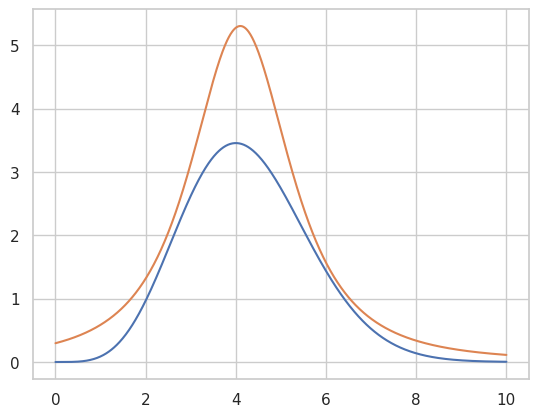

In [201]:
# plot the density over a 0, 10 interval
x = np.linspace(1e-15, 10, 1000)
y = f_pdf(x)
fig, ax = plt.subplots()
sns.lineplot(x=x, y=y, ax=ax)

# check g_pdf
y_ = g_dist.pdf(x) * M
sns.lineplot(x=x, y=y_, ax=ax)

/home/sjack/.cache/pypoetry/virtualenvs/computational-statistics-qlF0ErcH-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sjack/.cache/pypoetry/virtualenvs/computational-statistics-qlF0ErcH-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sjack/.cache/pypoetry/virtualenvs/computational-statistics-qlF0ErcH-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sjack/.cache/py

<Axes: >

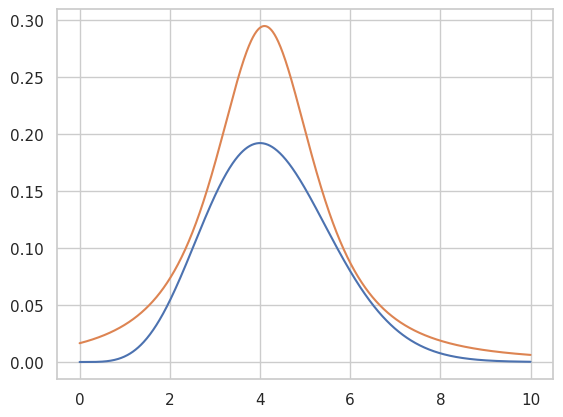

In [202]:
fig, ax = plt.subplots()
sns.lineplot(
    x=x,
    y=f_pdf(x) / M,
    ax=ax
)
sns.lineplot(
    x=x,
    y=g_dist.pdf(x),
    ax=ax
)


In [207]:
# Show that f_pdf(x) / M < g_pdf(x) for all x
x_all = np.linspace(0, 50, 50000)
print(np.all(
    f_pdf(x_all) / M < g_dist.pdf(x_all)
))

True


/tmp/ipykernel_1626/1302000464.py:12: RuntimeWarning: divide by zero encountered in log
  term2 = 2 * np.log(theta)
/tmp/ipykernel_1626/1302000464.py:15: RuntimeWarning: divide by zero encountered in log
  return np.exp((term1 + term2 + term3 - term4) + (2 * np.log(theta)))


In [208]:
# implement rejection sampling with the target and proposal

eps = np.finfo(float).eps

rng = np.random.default_rng(42)


def rejection_sampling(f_pdf: Callable, g_dist: ss.rv_continuous, M: float,  n: int, rng: np.random.Generator) -> np.ndarray:
    samples = []
    acceptances = 0
    rejections = 0
    while len(samples) < n:
        x_prop = g_dist.rvs(size=1, random_state=rng)
        u = rng.uniform(0, 1)
        if (u * M * g_dist.pdf(x_prop)) < f_pdf(x_prop):
            samples.append(x_prop)
            acceptances += 1
        else:
            rejections += 1
    print(f"Acceptance rate: {acceptances / (acceptances + rejections)}")
    return np.array(samples)

samples = rejection_sampling(f_pdf, g_dist, M, 20000, rng)



/tmp/ipykernel_1626/1302000464.py:12: RuntimeWarning: invalid value encountered in log
  term2 = 2 * np.log(theta)
/tmp/ipykernel_1626/1302000464.py:15: RuntimeWarning: invalid value encountered in log
  return np.exp((term1 + term2 + term3 - term4) + (2 * np.log(theta)))


Acceptance rate: 0.6681365671143181


/tmp/ipykernel_1626/1302000464.py:12: RuntimeWarning: divide by zero encountered in log
  term2 = 2 * np.log(theta)
/tmp/ipykernel_1626/1302000464.py:15: RuntimeWarning: divide by zero encountered in log
  return np.exp((term1 + term2 + term3 - term4) + (2 * np.log(theta)))
/home/sjack/.cache/pypoetry/virtualenvs/computational-statistics-qlF0ErcH-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sjack/.cache/pypoetry/virtualenvs/computational-statistics-qlF0ErcH-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sjack/.cache/pypoetry/virtualenvs/computational-statistics-qlF0ErcH-py3.1

<Axes: ylabel='Density'>

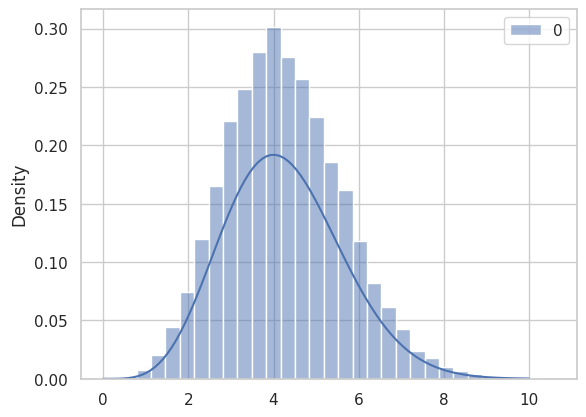

In [206]:
# plot the samples vs the target

x2 = np.linspace(0, 10, 100)

fig, ax = plt.subplots()
sns.lineplot(x=x2, y=f_pdf(x2)/M, ax=ax)
sns.histplot(samples, ax=ax, stat="density", bins=30)

#### Write your numerical answer below and its 95% confidence interval

In [209]:
def ci(samples: np.ndarray, alpha: float = 2) -> tuple:
    n = len(samples)
    mu = np.mean(samples)
    sigma = np.std(samples)
    return mu - (alpha * sigma / np.sqrt(n)), mu + (alpha * sigma / np.sqrt(n))

mu = np.mean(samples)
low_ci, high_ci = ci(samples)

In [210]:
v_value = mu # do not hard-code the number: assign the variable used in your previous computations
print('V: {}'.format(v_value))

v_ci = np.array([low_ci, high_ci]) # do not hard-code the number: assign the variable used in your previous computations
print('95% confidence interval: {}'.format(v_ci))

V: 4.250981734845961
95% confidence interval: [4.23157788 4.27038559]


### Explanation of your solution and justification of its correctness

I use rejection samping from a shift Student-T distribution. I chose rejection sampling because it's simple and our target is a normalised density.

I first iterated through various distributions that would be suitable for rejection sampling including: `gamma`, `normal`, `laplace` before finally settling on `Student-T`. 

`Gamma` did not work because it was not greater than $f(x)$ for any $M$ at $0$.

I both visually and numerically confirm that for $ g \sim T(\nu = 2, loc = 4.1, scale = 2.1)$ and $ M = 18 $ it holds that $f(x) / M < g(x)$ where $f(x) = p(\theta)$

I plot the samples to show that the samples follow the target pdf correctly, and take the mean and CI of the samples accordingly.

---

## OPTIONAL PROBLEMS: CHOOSE 2 OUT OF 3
---

Please note that answering all three problems will not give you extra points.

However, if you decide to return three problems, the problem with the lowest score out of the three will be discarded.

## 5. MCMC sampling and convergence

Implement a random walk Metropolis-Hastings MCMC sampler for the following model. Tune your sampler to work efficiently, and briefly justify and explain how you did this. Carefully check the convergence of your sampler and briefly justify and explain how you did this.

As our model we will consider a logistic regression model fitted to the observations $((\boldsymbol{x}_1, y_1), (\boldsymbol{x}_2, y_2), \dots, (\boldsymbol{x}_N, y_N))$. The code below will load the matrix $\boldsymbol{x}$ (each row is one sample) and vector $\boldsymbol{y}$.

The values $\boldsymbol{x}_1, \dots, \boldsymbol{x}_N$ are the *input values* and $y_1, \dots, y_N$ are the binary *target values*.

The data set comes from the Framingham Heart Study. The target variable (HAS_CHD) indicates whether the subject was diagnosed with heart disease. The input variables are in order:
  1. systolic blood pressure (SBP),
  2. diastolic blood pressure (DBP),
  3. number of cigarettes smoked per day (CIG), and 
  4. age (AGE).

The loading code normalises these to have zero mean and standard deviation $1/2$ to get the regression coefficients to a shared scale.

The logistic regression model is defined with the help of a logistic link function
$$ h_{\beta_0, \boldsymbol{\beta}}(\boldsymbol{x}_n) = \frac{1}{1 + e^{-(\beta_0 + x_{n1} \beta_1 + \dots + x_{n4} \beta_4})}, $$
where $\beta_0$ is the intercept of the model and $\boldsymbol{\beta} = (\beta_1, \dots, \beta_4)$ are the regression coefficients.
The likelihood of the model is
$$ p(\boldsymbol{y} \mid \boldsymbol{x}, \beta_0, \boldsymbol{\beta}) = \prod_{n=1}^N h_{\beta_0,\boldsymbol{\beta}}(\boldsymbol{x}_n)^{y_n} (1 - h_{\beta_0,\boldsymbol{\beta}}(\boldsymbol{x}_n))^{(1-y_n)}. $$

The regression weights $\beta_0$ and $\boldsymbol{\beta}$ have the hierarchical prior
$$ p(\beta_j) = \mathcal{N}(\beta_j;\; 0, \sigma_{\beta}^2), \quad j = 0, 1, \dots, 4, $$
where $\sigma_{\beta}$ is the standard deviation of the prior of $\beta_j$ with the prior 
$$ p(\sigma_{\beta}) = \chi^2(df = 1), $$ 
a chi-squared distribution with degrees of freedom $df=1$.


The full set of model parameters to infer is thus $\theta = (\sigma_{\beta}, \beta_0, \beta_1, \dots, \beta_4)$. Note that $\sigma_{\beta} > 0$, while $\beta_0, \beta_1, \ldots, \beta_4 \in (-\infty, \infty)$.

Write an MCMC sampler to sample from the joint posterior distribution $p(\theta \mid \boldsymbol{x}, \boldsymbol{y}) = p(\sigma_{\beta}, \beta_0, \beta_1, \dots, \beta_4 \mid \boldsymbol{x}, \boldsymbol{y})$ of all model parameters $\theta$.
Compute and print the posterior medians as well as 25% and 75% quantiles of the marginal posteriors of each parameter (also known as interquartile range).
Plot scatter plots with 1000 representative points from the pairwise marginal distributions of all pairs of parameters. Are some pairs of parameters unusually strongly correlated?

You may use `numpy`, `numpy.random`, `pandas`, `scipy.special`, `scipy.stats` and `matplotlib` functions for the task.

*Hint*: You can use `scipy.stats.chi2` for the chi-squared distribution.


In [210]:
%matplotlib inline
import seaborn as sns
from typing import Callable
import numpy as np
import numpy.random as npr
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
import scipy.special as scs
from dataclasses import dataclass
sns.set()
sns.set_style("whitegrid")
sns.set_palette("pastel")

heart_data = pd.read_csv('./heart_data.txt', sep='\t')
# Extract input variables
p4_x = heart_data[['SBP', 'DBP', 'CIG', 'AGE']].values.astype(float)
# Extract target variable
p4_y = heart_data['HAS_CHD'].values.astype(float)
# Remove mean from inputs
p4_x -= np.mean(p4_x, 0)
# Standardise input variance
p4_x /= 2*np.std(p4_x, 0)

# Convergence diagnostics, from previous exercises

def compute_B(samples: np.ndarray) -> float:
    n, m = samples.shape
    scalar = n / (m - 1)
    return scalar * np.sum([(np.mean(samples[:, j], axis=0) - np.mean(samples))**2 for j in range(m) ])


def compute_W(samples: np.ndarray) -> float:
    def compute_S(j: int) -> float:
        return np.mean((samples[:, j] - samples[:, j].mean())**2)
    _, m = samples.shape
    return np.mean([compute_S(j) for j in range(m)])

def rhat(samples: np.ndarray) -> float:
    n, _ = samples.shape
    w = compute_W(samples)
    b = compute_B(samples)

    var = ((n-1)/n) * w + (1/n) * b
    return np.sqrt(var / w)

def split_rhat(samples: np.ndarray) -> float:
    n, m = samples.shape
    assert n > m, "Expect shape (samples, chains)"
    split_at = n // 2
    split_samples = np.zeros((split_at, m*2))
    # do the split
    for i in range(0, split_samples.shape[1]):
        if i % 2 == 0:
            split_samples[:, i] = samples[split_at:, i//2]
        else:
            split_samples[:, i] = samples[:split_at, i//2]
    return rhat(split_samples)

# Model definition

def sigma_prior(s: float) -> float:
    x = ss.distributions.chi2(1).logpdf(s).sum()
    if np.isnan(x) or np.isinf(x):
        print("Sigma prior is nan or inf")
    return x

def beta_prior(betas: np.ndarray, s: float) -> float:
    assert betas.shape == (5,)
    x = ss.distributions.norm(0, s**2).logpdf(betas).sum()
    if np.isnan(x) or np.isinf(x):
        print("Beta prior is nan or inf")
    return x

def log_likelihood(y: np.ndarray, x: np.ndarray, betas: np.ndarray) -> np.ndarray:
    assert betas.shape == (5,)
    # logistic regression log likelihood
    z = betas[0] + np.dot(x, betas[1:])
    lh = np.sum(y * np.log(scs.expit(z)) + (1 - y) * np.log(1 - scs.expit(z)))
    if np.isnan(lh).any() or np.isinf(lh).any():
        print("Log likelihood is nan or inf")
    if lh >= 0:
        print("Log likelihood is positive - this means that output is not a valid probability")
    return lh

def log_posterior(theta: np.ndarray, x: np.ndarray, y: np.ndarray) -> float:
    assert theta.shape == (6,)
    sigma = theta[0]
    s = np.exp(sigma)
    betas = theta[1:]
    return np.sum(sigma_prior(s) + sigma + beta_prior(betas, s) + sigma + log_likelihood(y, x, betas))

# MCMC implementation

def mcmc(x: np.ndarray, y: np.ndarray, theta0: np.ndarray, n_samples: int, n_burnin: int, rng: npr.Generator,  proposal: Callable[[np.ndarray], np.ndarray]) -> np.ndarray:
    samples = np.zeros((n_samples, len(theta0)))
    theta = theta0.copy()
    accepts = 0
    for i in range( n_samples):
        theta_new = theta + proposal()
        u = np.log(rng.random())
        if u < log_posterior(theta_new, x, y) - log_posterior(theta, x, y):
            theta = theta_new
            accepts += 1
        samples[i] = theta
    return accepts / n_samples, samples[n_burnin:]



In [211]:
# Tuning

rng = npr.default_rng(42)
n_chains = 4
n_samples = 2000
n_burnin = n_samples // 2

@dataclass
class MCMCTuningResult:
    proposal_dist_name: str
    scale_param: float
    acceptance_rate: float

    def __str__(self,) -> str:
        return f"Proposal: {self.proposal_dist_name} - Scale: {self.scale_param} - Acceptance rate: {self.acceptance_rate:.4f}"

# This tuning process can take a while to run

# tuning_results = []
# for scale_param in np.linspace(0.05, 0.15, 25):
#     proposal_normal = lambda: rng.normal(loc=0, scale=scale_param, size=6)
#     # proposal_laplace = partial(rng.laplace, scale=scale_param, size=6)
#     for g_pdf in [proposal_normal,]:# proposal_laplace]:
#         for c in range(n_chains):
#             acceptance_rates = []
#             acceptance_rate, samples = mcmc(
#                 p4_x, p4_y, rng.normal(0, .1, size=6), n_samples, n_burnin, rng, g_pdf
#             )
#             acceptance_rates.append(acceptance_rate)
#         mean_accept = np.mean(acceptance_rates)
#         tuning_results.append(MCMCTuningResult(proposal_dist_name="normal", scale_param=scale_param, acceptance_rate=mean_accept))
#         print(tuning_results[-1])


Proposal: normal - Scale: 0.05 - Acceptance rate: 0.6080
Proposal: normal - Scale: 0.05416666666666667 - Acceptance rate: 0.5750
Proposal: normal - Scale: 0.058333333333333334 - Acceptance rate: 0.5310
Proposal: normal - Scale: 0.0625 - Acceptance rate: 0.5150
Proposal: normal - Scale: 0.06666666666666667 - Acceptance rate: 0.4840
Proposal: normal - Scale: 0.07083333333333333 - Acceptance rate: 0.4655
Proposal: normal - Scale: 0.07500000000000001 - Acceptance rate: 0.4285
Proposal: normal - Scale: 0.07916666666666666 - Acceptance rate: 0.4125
Proposal: normal - Scale: 0.08333333333333334 - Acceptance rate: 0.3945
Proposal: normal - Scale: 0.0875 - Acceptance rate: 0.3675
Proposal: normal - Scale: 0.09166666666666667 - Acceptance rate: 0.3565
Proposal: normal - Scale: 0.09583333333333333 - Acceptance rate: 0.3240
Proposal: normal - Scale: 0.1 - Acceptance rate: 0.3150
Proposal: normal - Scale: 0.10416666666666667 - Acceptance rate: 0.2755
Proposal: normal - Scale: 0.10833333333333334 - 

In [241]:

# tuned_results = sorted(tuning_results, key=lambda x: np.abs(x.acceptance_rate - .23))
# best_tuning_result = tuned_results[0]
best_tuning_result = MCMCTuningResult(proposal_dist_name="normal", scale_param=0.125, acceptance_rate=0.2370)
print("Best tuning result:", best_tuning_result)

Best tuning result: Proposal: normal - Scale: 0.125 - Acceptance rate: 0.2370


In [213]:
# Actual MCMC, now with tuned proposal
# Takes about 6 minutes on gpu
n_chains = 4
n_samples = 50000
n_burnin = n_samples // 2


rng = npr.default_rng(42) # reset the random number generator
tuned_proposal = lambda: rng.normal(loc=0, scale=best_tuning_result.scale_param, size=6)
samples = np.zeros((n_burnin, n_chains, 6))
for c in range(n_chains):
    acceptance, chain_samples = mcmc(
        x=p4_x, y=p4_y, theta0=rng.normal(0, .5, size=6), n_samples=n_samples, n_burnin=n_burnin, rng=rng, proposal=tuned_proposal
    )
    print(f"Chain {c} - Acceptance rate: {acceptance:.4f}")
    samples[:, c] = chain_samples

Chain 0 - Acceptance rate: 0.2331
Chain 1 - Acceptance rate: 0.2276
Chain 2 - Acceptance rate: 0.2295
Chain 3 - Acceptance rate: 0.2304


In [214]:
params = ['sigma', 'beta0', 'beta1', 'beta2', 'beta3', 'beta4']

In [215]:
print(f"Split Rhat by parameter: {[(param, split_rhat(samples[:, :, i])) for i, param in enumerate(params)]}")

Split Rhat by parameter: [('sigma', 1.0025337438361666), ('beta0', 1.0001864020862614), ('beta1', 1.004586228714215), ('beta2', 1.0039014914106505), ('beta3', 1.0004775009095725), ('beta4', 1.0005793855812097)]


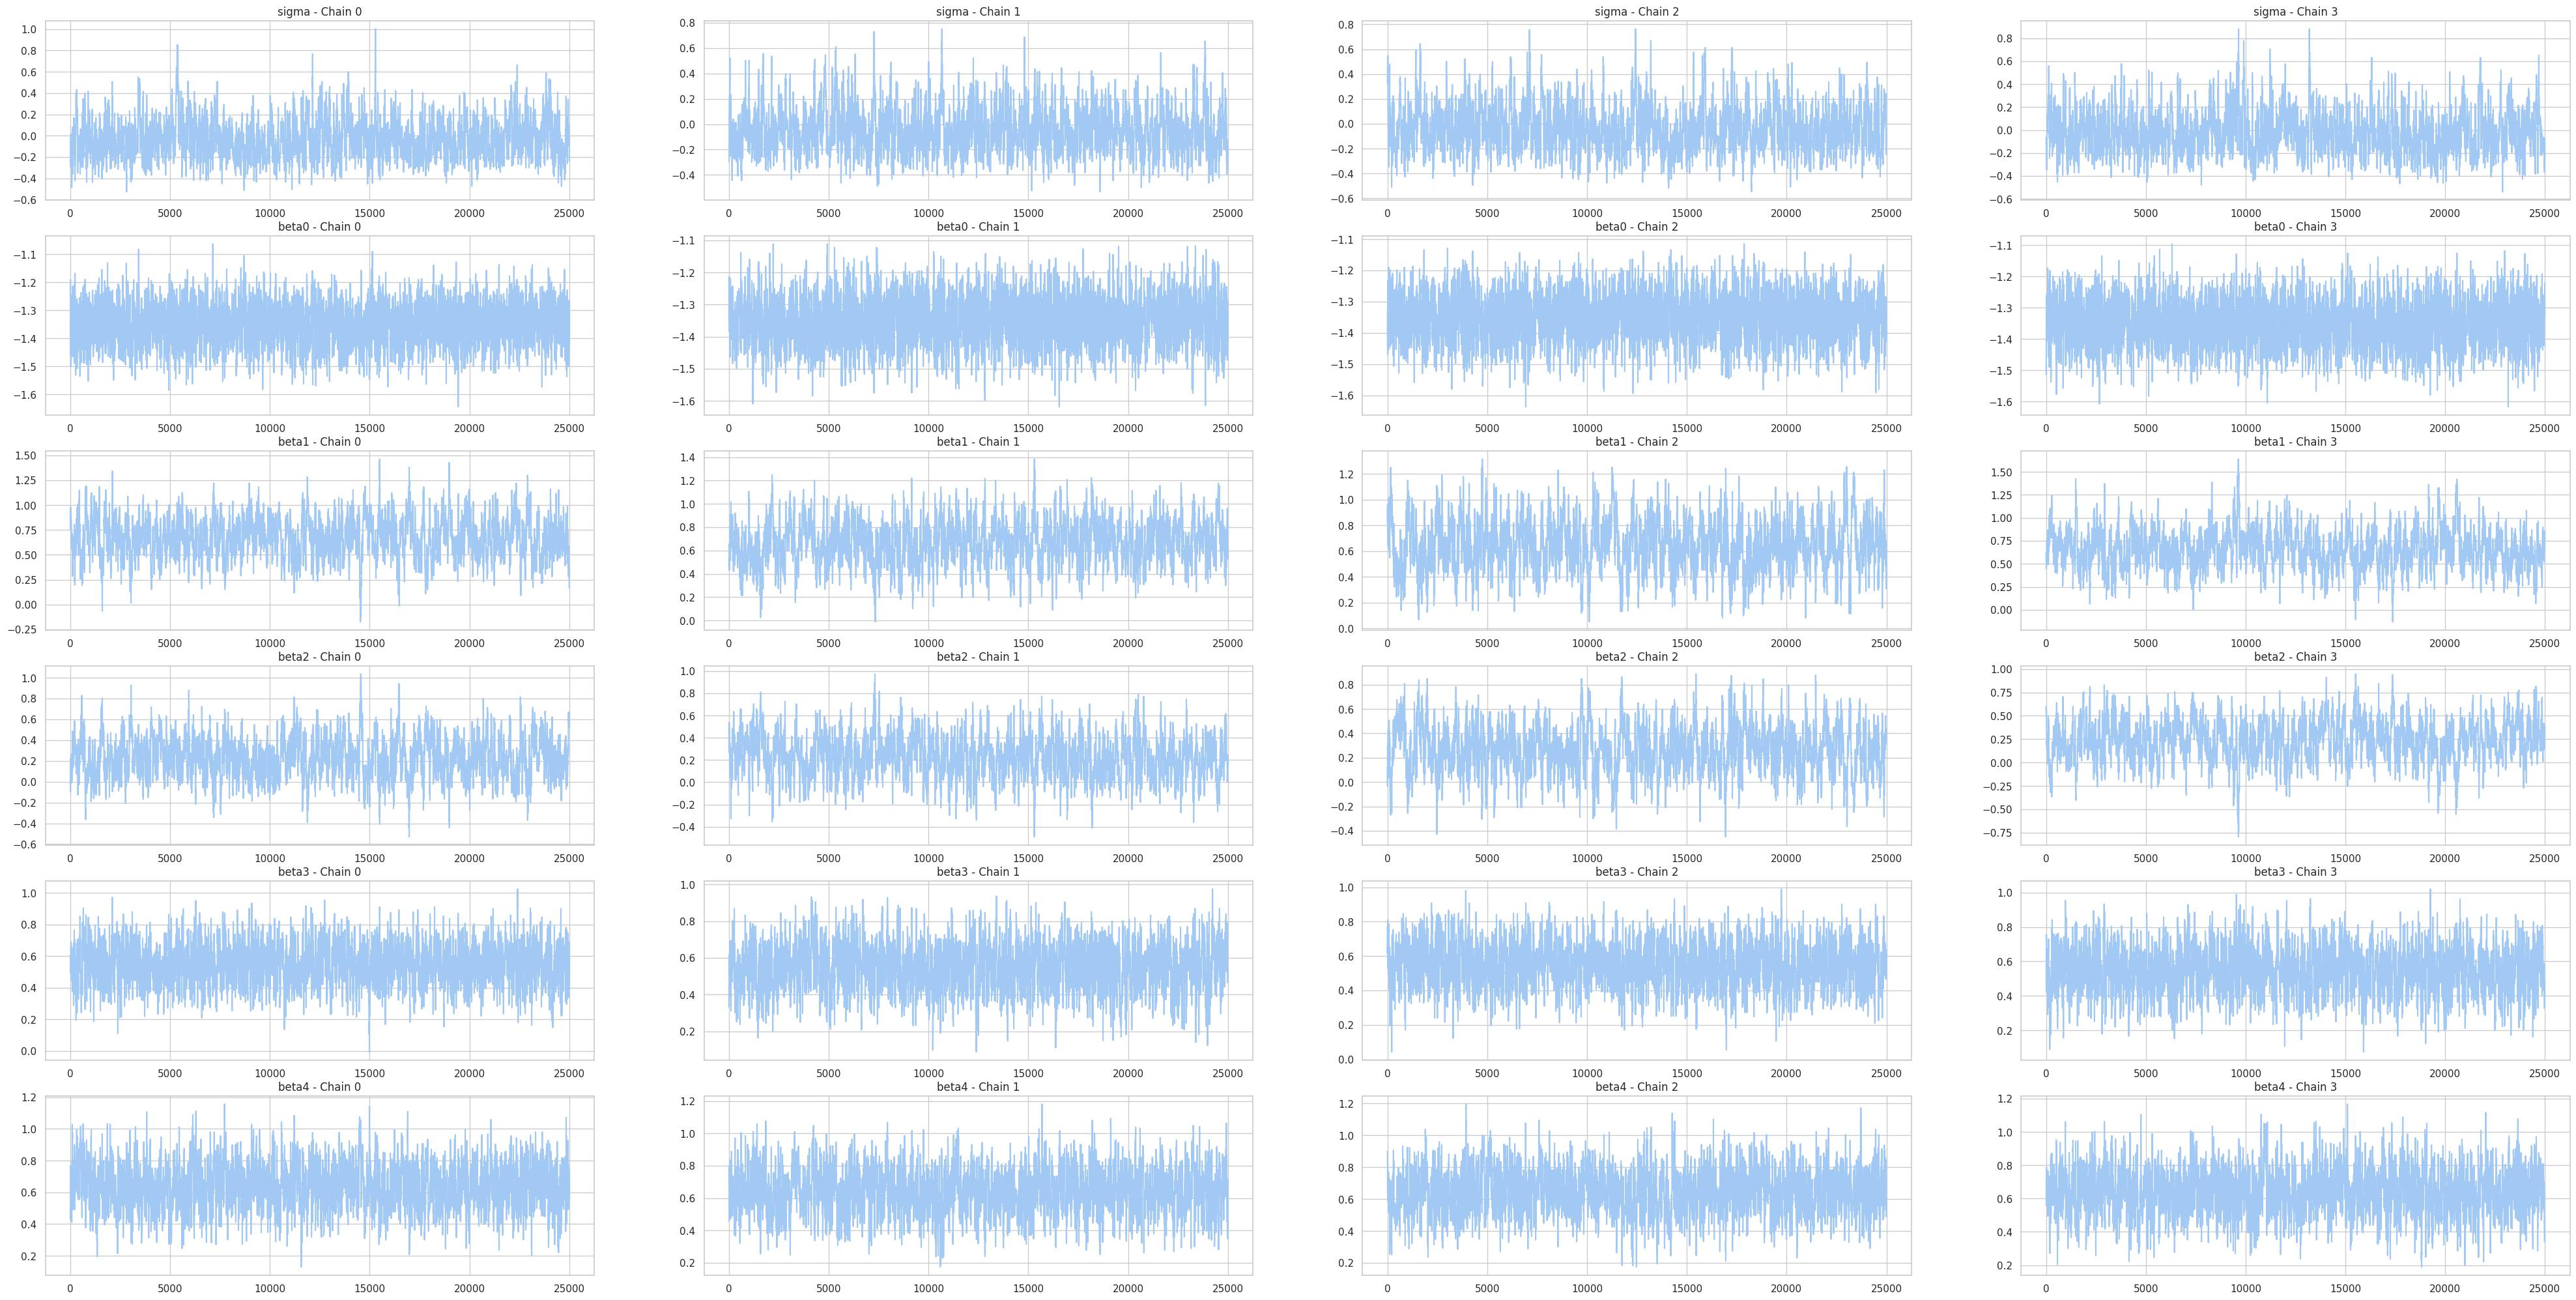

In [216]:
fig, ax = plt.subplots(len(params), n_chains, figsize=(50, 25))
for i, p in enumerate(params):
    for c in range(n_chains):
        ax[i, c].plot(samples[:, c, i])
        ax[i, c].set_title(f"{p} - Chain {c}")

In [217]:
# mean across chains
cross_chain_samples = samples.mean(axis=1)

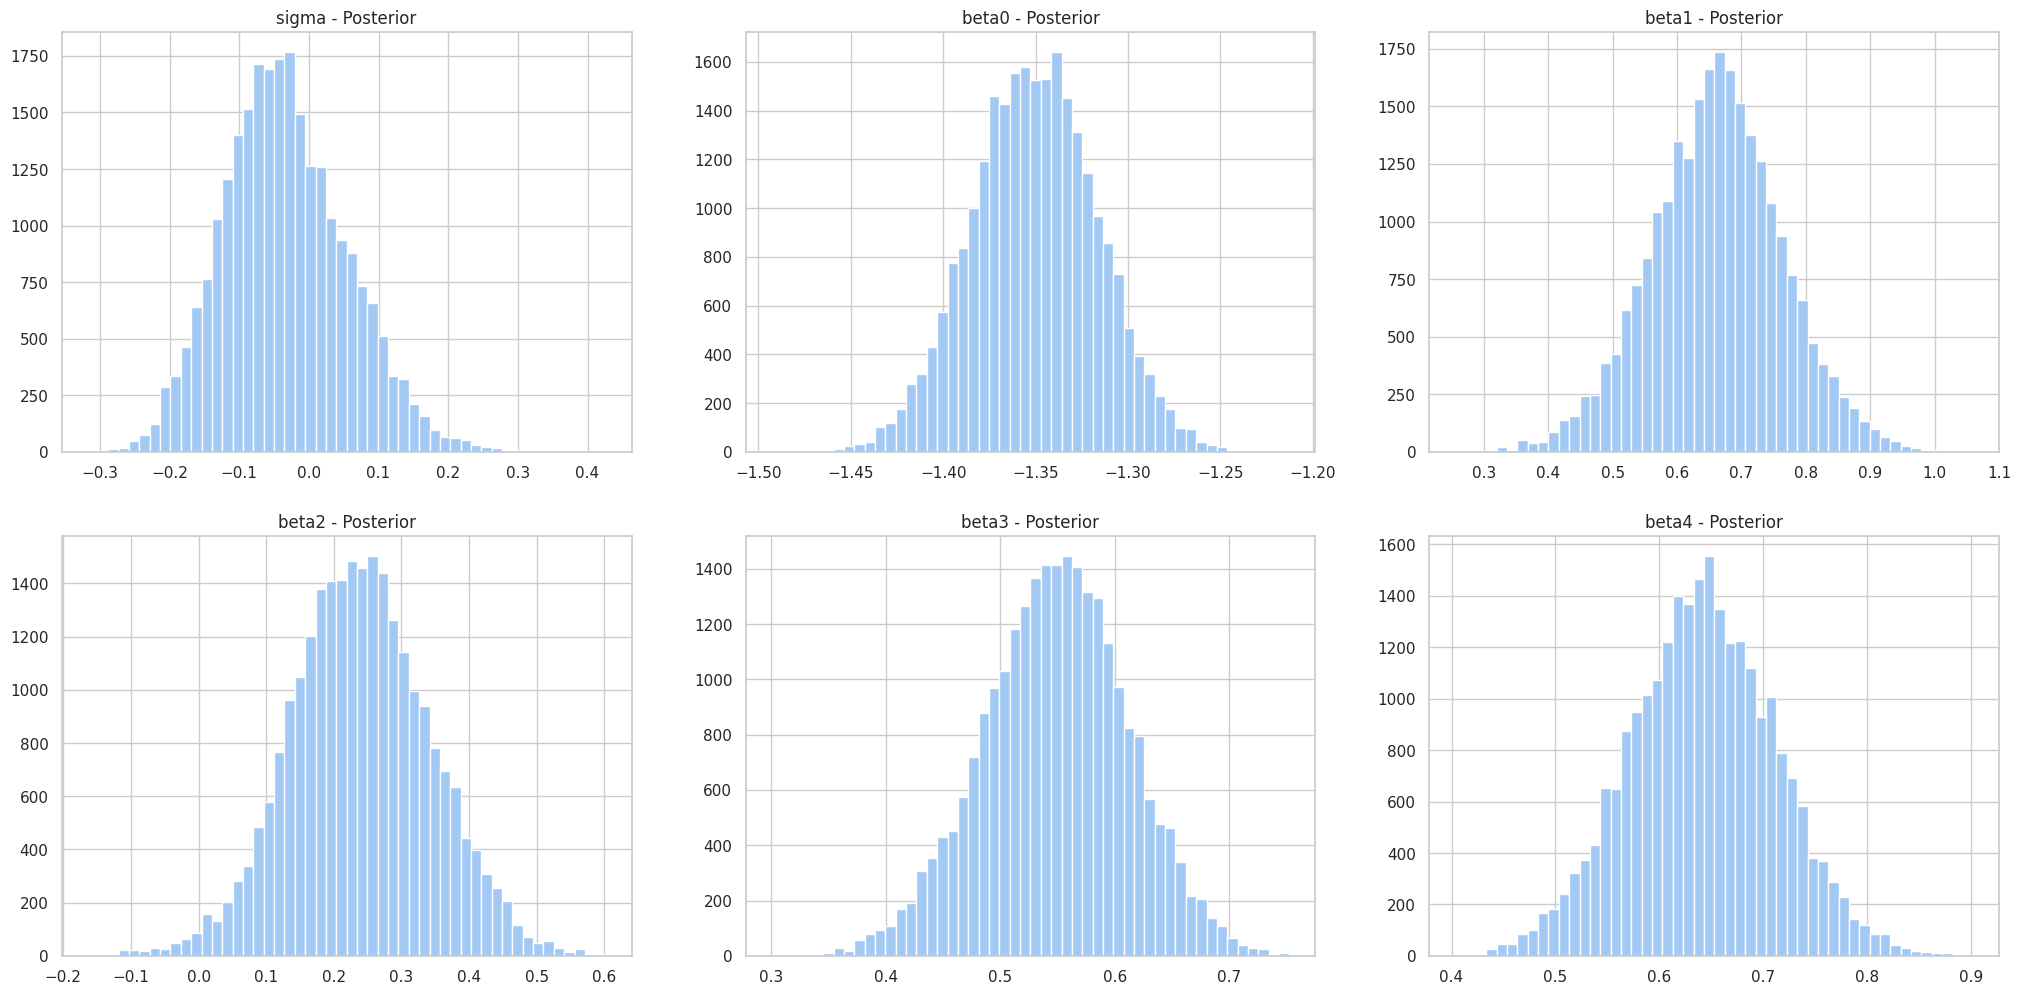

In [218]:
# plot the posteriors
n_bins = 50
fig, ax = plt.subplots(2, 3, figsize=(25, 12))
for i, p in enumerate(params):
    ax[i//3, i%3].hist(cross_chain_samples[:, i], bins=n_bins)
    ax[i//3, i%3].set_title(f"{p} - Posterior")


In [219]:
cross_chain_samples = samples.mean(axis=1)
# transform sigma to s
cross_chain_samples[:, 0] = np.exp(cross_chain_samples[:, 0])
parameter_medians = np.median(cross_chain_samples, axis=0)
parameter_25pc = np.quantile(cross_chain_samples, .25, axis=0)
parameter_75pc = np.quantile(cross_chain_samples, .75, axis=0)

#### Write your numerical answers below:

In [220]:
posterior_median = parameter_medians # do not hard-code the number: assign the variables used in your previous computations
posterior_lower = parameter_25pc # do not hard-code the number: assign the variables used in your previous computations
posterior_upper = parameter_75pc # do not hard-code the number: assign the variables used in your previous computations

print('Posterior medians (50% quantiles): {}'.format(posterior_median))
print('Posterior 25% quantiles: {}'.format(posterior_lower))
print('Posterior 75% quantiles: {}'.format(posterior_upper))

Posterior medians (50% quantiles): [ 0.96098339 -1.35045071  0.66243196  0.23792488  0.54921922  0.64181799]
Posterior 25% quantiles: [ 0.90824863 -1.37380669  0.59467028  0.17065917  0.50617127  0.5938064 ]
Posterior 75% quantiles: [ 1.02341322 -1.32747895  0.72838494  0.30704619  0.59091184  0.68897791]


### Justification/explanation for tuning of the sampler:

I used an iterative process to find a suitable proposal distribution. I created code that iterates through potential scale parameters of proposal distributions. Staring with both `Normal` and `Laplace` proposal distributions, I searched for the following criteria:

- Mean (across 4 chains) acceptance rate of approximate ~23%, given that we have a multi-parameter likelihood.
- A split R-hat value that was reasonable **given a low number of samples** e.g. it should not be exceptionally high compared to other comparable values for the scale parameter.

I settled on the following proposal distribution:

$ q(\theta) = N(0, 0.125^2)$

Which gave a mean acceptance rate of $23\%$ across $n=4$ chains with $2000$ samples each, with a split-$\hat{R}$ of $8.5$.

 I used a relatively low number of samples in the tuning phase to iterate quickly and find a suitable proposal distribution for the task.

### Justification/explanation for the convergence checking:

Sampling was performing across $n=4$ chains for $50000$ samples, of which $25000$ were discared as so-called warmup/burn-in samples.

I created trace plots to show the random walks of each chain for each MCMC parameter. There is no concering auto-correlation e.g. the random walk seems to be performing correctly.

The split-$\hat{R}$ values are acceptable: for every parameter the value is $1.001 \pm{0.001}$.



## 6. Variational inference of a multivariate mixture distribution

In this exercise you are asked to use variational inference to approximate a target density $p(\boldsymbol{\theta})$ with a variational approximation $q(\boldsymbol{\theta})$, with $\boldsymbol{\theta} = (\theta_1, \theta_2) \in \mathbb{R}^2$.

The target density is a mixture of $K = 4$ products of shifted (or non-standardized) Students' t distributions (each dimension of a mixture component has an independent shifted Student's t) defined as follows:
$$
p(\boldsymbol{\theta}; \boldsymbol{\mu}_1, \ldots, \boldsymbol{\mu}_K, \boldsymbol{\nu}, \boldsymbol{w}) = \sum_{k=1}^K w_k \prod_{d=1}^2 t_{\nu_{k}}\left(\theta_d; \mu_{k,d} \right)
$$
where $\nu_k$ are degrees of freedom for each component, $\mu_{k,d}$ are the location parameters for each shift, and the mixture parameters are the following:
- $\boldsymbol{\mu}_1 = (-4, 2)$, $\boldsymbol{\mu}_2 = (-2, -3.5)$, $\boldsymbol{\mu}_3 = (0, 0)$, $\boldsymbol{\mu}_4 = (3, 4)$
- $\boldsymbol{\nu} = (4,4,3,30)$
- $\boldsymbol{w} = (0.3,0.3,0.1,0.3)$

As variational distribution we will use a product of independent distributions,

$$q(\boldsymbol{\theta}) = q(\theta_1) \cdot q(\theta_2)$$

where  $q(\theta_1)$ and $q(\theta_2)$ are normal distributions. Fit the variational approximation $q(\boldsymbol{\theta})$ to the density $p(\boldsymbol{\theta})$. Please note that the independence assumption above is equivalent to saying that $q(\boldsymbol{\theta})$ is a multivariate normal with diagonal covariance matrix $\boldsymbol{\Sigma}$.

For the best variational solution you find (according to the ELBO), report the means and standard deviations of $q(\theta_1)$ and $q(\theta_2)$ and its ELBO. Describe how you validated your results and discuss your observations.

You may use `numpy`, `numpy.random`, `scipy.special`, `scipy.stats`, `matplotlib` functions for the task, and any linear algebra function you may need (e.g., `numpy.linalg`). You may use `autograd` and `torch`.

*Hint*: Use the formula of the ELBO found in section 0 of the Lecture 11 class tasks.

In [226]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_palette("pastel")

from dataclasses import dataclass

import torch
from torch import tensor, Tensor
from torch.autograd import Variable
from typing import Callable
if torch.cuda.is_available():
    torch.set_default_tensor_type(torch.cuda.DoubleTensor)
else:
    torch.set_default_tensor_type(torch.DoubleTensor)


mu1 = tensor([-4., 2.])
mu2 = tensor([-2., -3.5])
mu3 = tensor([0., 0.])
mu4 = tensor([3., 4.])

nu = tensor([4., 4., 3., 30.])

w = tensor([.3, .3, .1, .3])

@dataclass
class DSVIResult:
    m: Tensor
    c: Tensor
    elbo: Tensor

def mixture_log_likelihood(theta: Tensor) -> Tensor:

    def check_logprob(x: Tensor, name: str) -> None:
        assert not torch.isnan(x).any() and not torch.isinf(x).any(), f"Log prob {name} contains nan or inf: {x}"
    # all mixtures in log space
    log_w = torch.log(w)
    first_mixture = torch.sum(
        torch.distributions.StudentT(df=nu[0], loc=mu1, validate_args=True).log_prob(theta), dim=-1
    )
    second_mixture = torch.sum(
        torch.distributions.StudentT(df=nu[1], loc=mu2, validate_args=True).log_prob(theta), dim=-1
    )

    third_mixture = torch.sum(
        torch.distributions.StudentT(df=nu[2], loc=mu3, validate_args=True).log_prob(theta), dim=-1
    )
    fourth_mixture = torch.sum(
        torch.distributions.StudentT(df=nu[3], loc=mu4, validate_args=True).log_prob(theta), dim=-1
    )
    check_logprob(first_mixture, "first mixture")
    check_logprob(second_mixture, "second mixture")
    check_logprob(third_mixture, "third mixture")
    check_logprob(fourth_mixture, "fourth mixture")
    mixture_logprobs = torch.stack([first_mixture, second_mixture, third_mixture, fourth_mixture])
    if log_w.shape != mixture_logprobs.shape:
        log_w = log_w.reshape((-1, 1))
    weighted_logprobs = log_w + mixture_logprobs
    check_logprob(weighted_logprobs, "weighted logprobs")
    return weighted_logprobs.logsumexp(dim=0)

def dsvi(m0: Tensor, c0: Tensor, likelihood: Callable[[Tensor], Tensor], n_iter: int, eta: Callable[[], Tensor]) -> tuple[Tensor, Tensor]:


    m_history = torch.zeros((n_iter, 2))
    c_history = torch.zeros((n_iter, 2))
    elbo_history = torch.zeros((n_iter,))

    m = m0
    c = c0
    rho0 = .05
    t0 = 100

    for t in range(n_iter):
        assert not torch.isnan(m).any() and not torch.isinf(m).any(), "m is nan or inf"
        # Re-parametrization trick
        eta_ = eta()
        theta = (c @ eta_ + m).detach().requires_grad_(True)

        # Compute posterior and gradient
        log_lh = likelihood(theta)
        log_lh.backward()
        g = theta.grad
        
        # Update the parameters based on the gradient
        m = m + rho0 / (t + t0) * g
        c = c + rho0 / (t + t0) * (torch.outer(g, eta_) + (1/c.diag()))


        # Store the samples
        theta.grad.zero_()

        m_ = m.clone().detach()
        c_ = c.clone().detach().diag()

        m_history[t] = m_
        c_history[t] = c_
        elbo_history[t] = compute_ELBO(m_, c_, likelihood)

    return m_history.cpu(), c_history.cpu(), elbo_history.cpu()

def compute_ELBO(m: Tensor, c: Tensor, target: Callable[[Tensor], Tensor], n_samples: int = 10_000) -> Tensor:
    eta_ = torch.randn((n_samples, 2))
    theta = c * eta_ + m

    log_lh = target(theta)
    log_q = torch.distributions.MultivariateNormal(loc=m, covariance_matrix=torch.eye(2) * c, validate_args=True).log_prob(theta)

    return torch.mean(log_lh - log_q)    



In [227]:
torch.manual_seed(42)
# Takes about 6 minutes on my GPU

m_history, c_history, elbo_history = dsvi(
    m0=torch.zeros(2), c0=torch.eye(2),
    likelihood=mixture_log_likelihood, n_iter=50000,
    eta=lambda: torch.randn(2)
)

Text(0.5, 0.98, 'DSVI - Mean and covariance convergence')

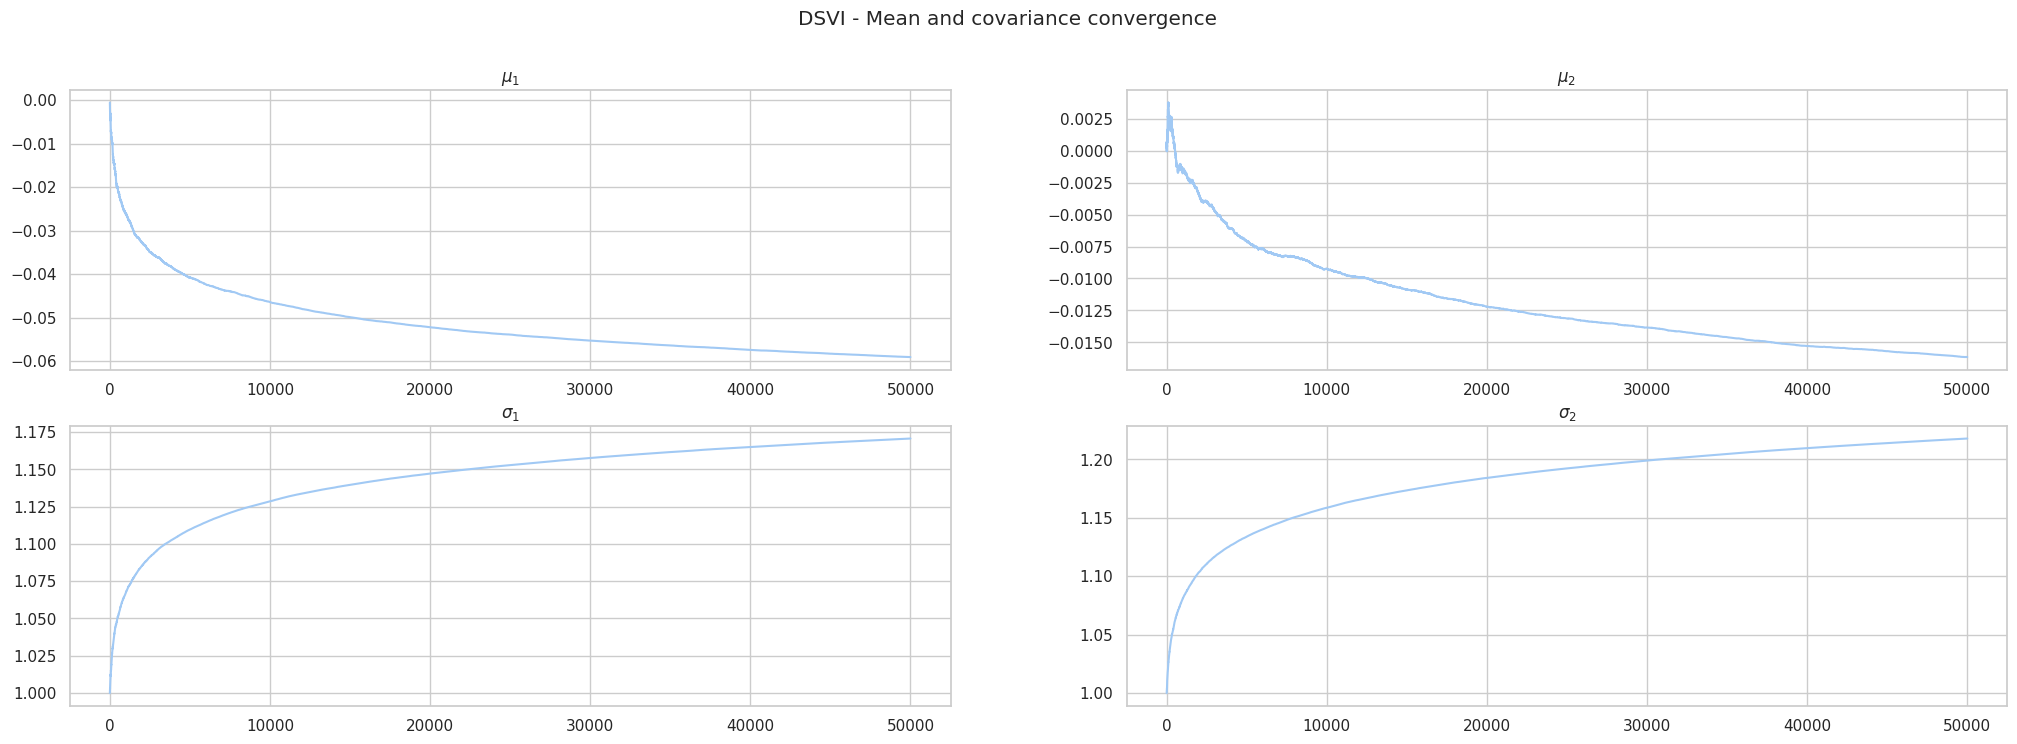

In [228]:
fig, axes = plt.subplots(2,2, figsize=(25, 8))
axes[0,0].plot(m_history[:, 0])
axes[0,0].set_title("$\mu_1$")
axes[0,1].plot(m_history[:, 1])
axes[0,1].set_title("$\mu_2$")
axes[1,0].plot(c_history[:, 0])
axes[1,0].set_title("$\sigma_1$")
axes[1,1].plot(c_history[:, 1])
axes[1,1].set_title("$\sigma_2$")
fig.suptitle("DSVI - Mean and covariance convergence")


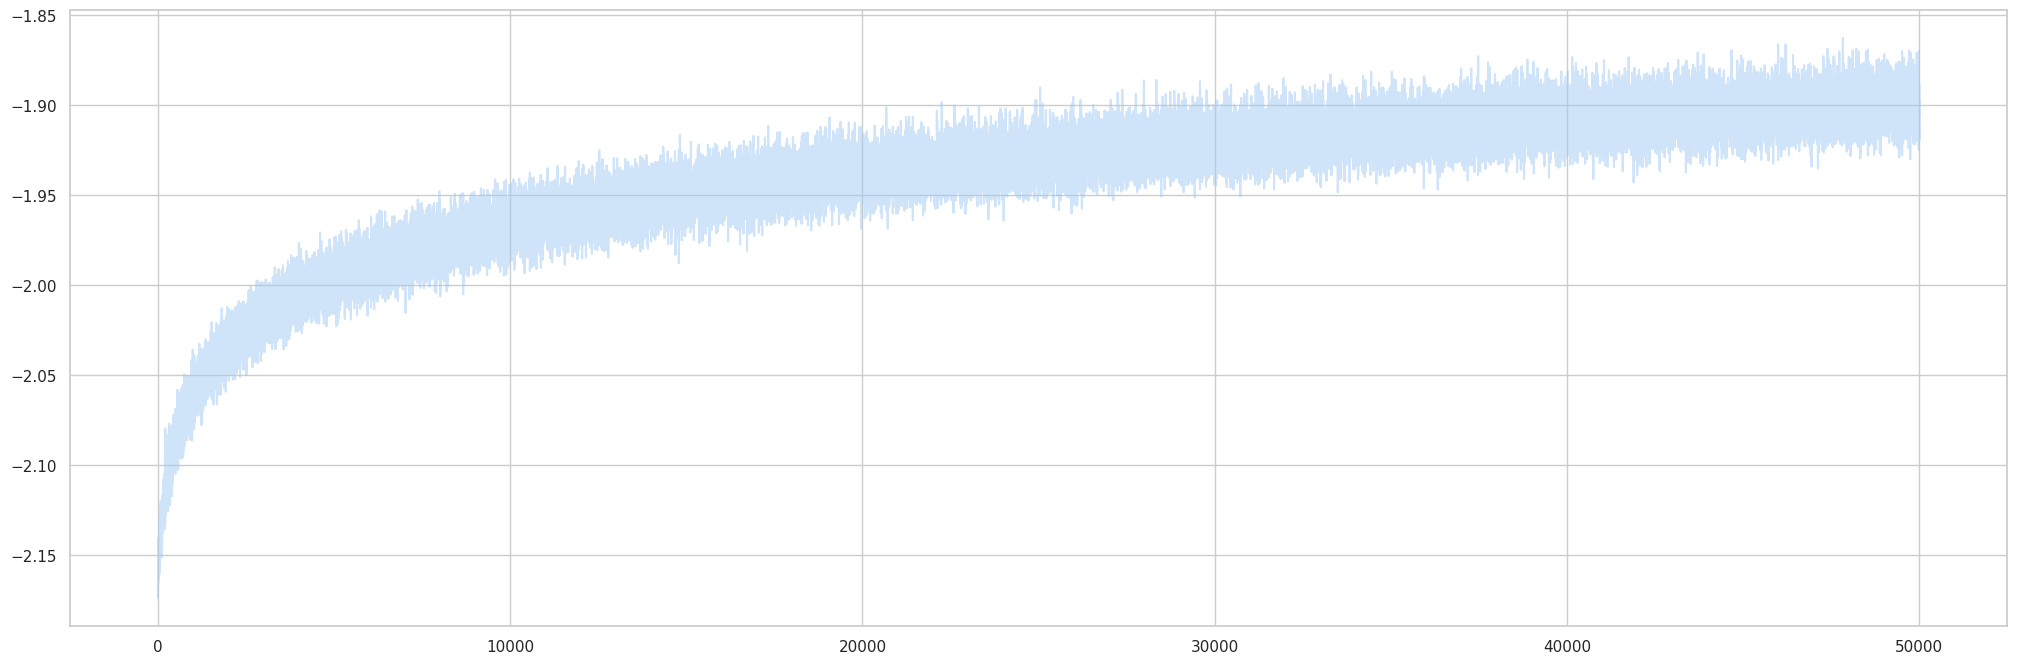

In [230]:
fig, ax = plt.subplots(figsize=(25, 8))
ax.plot(elbo_history, label="ELBO", alpha=.5)

In [237]:
m, c = m_history[torch.argmax(elbo_history)], c_history[torch.argmax(elbo_history)]
m, c

(tensor([-0.0587, -0.0160], device='cpu'),
 tensor([1.1696, 1.2162], device='cpu'))

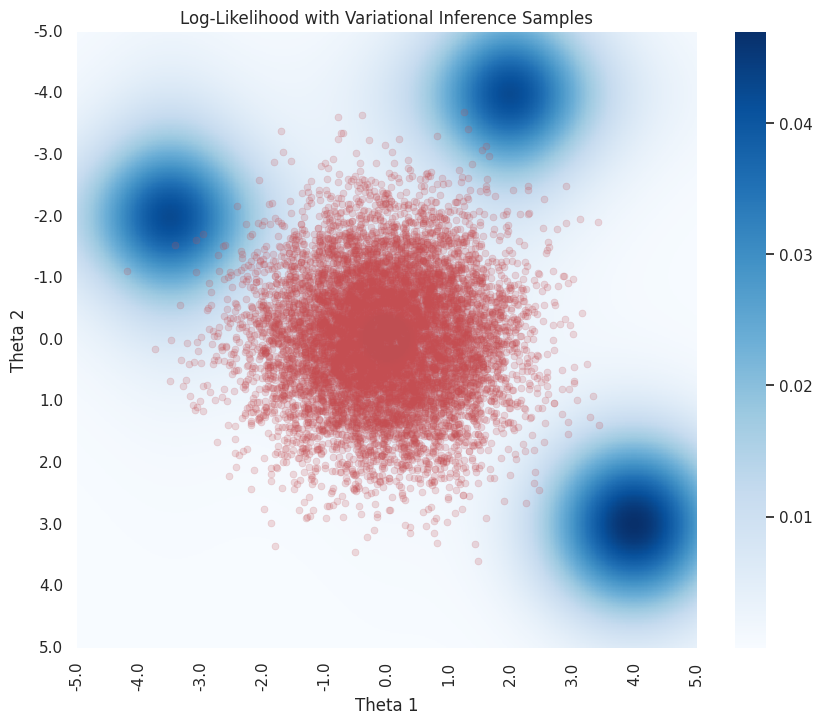

In [238]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# These are your actual samples from variational inference (example values used here).
samples = torch.randn((100, 2)) * 0.5  # Scaled for demonstration

# Set the range and number of points per axis
range_min, range_max, num_points = -5, 5, 500

# Generate a grid of points
x = torch.linspace(range_min, range_max, num_points)
y = torch.linspace(range_min, range_max, num_points)
xx, yy = torch.meshgrid(x, y)

theta_pairs = torch.stack([xx.reshape(-1), yy.reshape(-1)], dim=1)

# Calculate the log-likelihood
log_likelihood_values = torch.exp(mixture_log_likelihood(theta_pairs))
log_likelihood_values = log_likelihood_values.reshape(num_points, num_points)

# Convert the torch tensor to a numpy array for seaborn
log_likelihood_np = log_likelihood_values.detach().cpu().numpy()

# Create the heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(log_likelihood_np, cmap="Blues",
                 xticklabels=np.linspace(range_min, range_max, num_points),
                 yticklabels=np.linspace(range_min, range_max, num_points),
                 cbar=True)

# Fix the axis labels
ax.set_xticks(np.linspace(0, num_points, 11))  # Set 11 ticks
ax.set_yticks(np.linspace(0, num_points, 11))
ax.set_xticklabels(np.round(np.linspace(range_min, range_max, 11), 2))  # Show these values
ax.set_yticklabels(np.round(np.linspace(range_min, range_max, 11), 2))
plt.xlabel("Theta 1")
plt.ylabel("Theta 2")

# Overlay the variational inference samples
m = m_history[torch.argmin(elbo_history)]
c = c_history[torch.argmin(elbo_history)]
samples_np = torch.distributions.MultivariateNormal(loc=m, covariance_matrix=torch.eye(2, device='cpu') * c, validate_args=True).sample((10_000,)).detach().cpu().numpy()
# Scale the sample points to the heatmap coordinate system
samples_scaled = ((samples_np - range_min) / (range_max - range_min) * (num_points - 1))

for sample in samples_scaled:
    ax.plot(sample[0], sample[1], 'ro', markersize=5, markeredgecolor='r', markeredgewidth=0.5, alpha=.2)

plt.title("Log-Likelihood with Variational Inference Samples")
plt.show()


#### Write your numerical answers below:

In [236]:
vp_means = m_history[torch.argmax(elbo_history)] # do not hard-code the number: assign the variables used in your previous computations
vp_stds = c_history[torch.argmax(elbo_history)] # do not hard-code the number: assign the variables used in your previous computations
best_elbo = elbo_history[torch.argmax(elbo_history)] # do not hard-code the number: assign the variables used in your previous computations

print('Variational posterior means: {}'.format(vp_means))
print('Variational posterior standard deviations: {}'.format(vp_stds))
print('ELBO of best solution: {}'.format(best_elbo))

Variational posterior means: tensor([-0.0587, -0.0160], device='cpu')
Variational posterior standard deviations: tensor([1.1696, 1.2162], device='cpu')
ELBO of best solution: -1.862549244727075


### Your textual answer explaining your solution:

I use a similar DSVI as we implemented earlier in the course. 

I run variational inference for $50000$ iterations, watching that the parameters begin to stabilise over each iteration, keeping in mind, that VI will never converge to an exact solution as it is only an approximation.

Also, the distribution to approximate is quite challenging (a 4 part 2-d mixture with a single 2-d normal), so it is to be expected. I see that the ELBO improves as $n$ samples increases, but the rate at which it improves slows down (to be expected).

I plot the samples drawn from a 2-d normal distribution parametrised by the posterior parameters found by variational inference over the density of the mixture model. The results seem plausible, even though the densities do not overlay. 

The goal of the VI process is to reduce the loss/divergence between the two densities, and a single normal might best approximate a 4-part mixture by having its location near the centre of the mixture. This is how I interpret my results.